# Test 7

Guys we are so close omgfaghjksfhdjksldfgmn

## Test-Wide Thingymabobbies

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score, ConfusionMatrixDisplay
import monke_features as mf
import monke_classify as mc
import monke_io as mio
import matplotlib.pyplot as plt

In [26]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

In [50]:
def prep_train_test_data(pose_data, labels, train_names, test_names=None, weights=None, test_size=0.2):
    training_data = []
    training_labels = []

    if weights is not None:
        training_weights = []

    testing_data = {}
    testing_labels = {}

    for name in train_names:
        pose_train = pose_data[name]
        labels_train = labels[name]

        if weights is not None:
            weights_train = weights[name]
            X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(pose_train, labels_train, weights_train, test_size=test_size)
            training_weights.append(z_train)
        else:
            X_train, X_test, y_train, y_test = train_test_split(pose_train, labels_train, test_size=test_size)

        training_data.append(X_train)
        training_labels.append(y_train)

        if test_names is not None:
            if name in test_names:
                testing_data[name] = X_test
                testing_labels[name] = y_test
        else:
            testing_data[name] = X_test
            testing_labels[name] = y_test
        
    if(len(training_data) > 1):
        training_data = np.concatenate(training_data)
        training_labels = np.concatenate(training_labels)
        if weights is not None:
            training_weights = np.concatenate(training_weights)
    else:
        training_data = training_data[0]
        training_labels = training_labels[0]
        if weights is not None:
            training_weights = training_weights[0]

    if weights is None:
        return training_data, testing_data, training_labels, testing_labels
    else:
        return training_data, testing_data, training_labels, testing_labels, training_weights

def prep_multi_train_test_data(pose_data, labels, train_names, test_names=None, weights=None, test_size=0.2):
    training_data = {}
    training_labels = {}

    if weights is not None:
        training_weights = {}

    testing_data = {}
    testing_labels = {}

    for name in train_names:
        pose_train = pose_data[name]
        labels_train = labels[name]

        if weights is not None:
            weights_train = weights[name]
            X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(pose_train, labels_train, weights_train, test_size=test_size)
            training_weights[name] = z_train
        else:
            X_train, X_test, y_train, y_test = train_test_split(pose_train, labels_train, test_size=test_size)

        training_data[name] = X_train
        training_labels[name] = y_train
        
        if test_names is not None:
            if name in test_names:
                testing_data[name] = X_test
                testing_labels[name] = y_test
        else:
            testing_data[name] = X_test
            testing_labels[name] = y_test

    if weights is None:
        return training_data, testing_data, training_labels, testing_labels
    else:
        return training_data, testing_data, training_labels, testing_labels, training_weights

def process_data(pose_data, labels, process):
    processed_data = {}
    processed_labels = {}

    for name in pose_data:
        processed_data[name] = process(pose_data[name])
        processed_labels[name] = labels[name][:processed_data[name].shape[0]]
    
    return processed_data, processed_labels

def test_classify(clf, test_data, test_labels):
    predicted_labels = clf.predict(test_data)
    mcc = matthews_corrcoef(test_labels, predicted_labels)
    f1 = f1_score(test_labels, predicted_labels)
    acc = accuracy_score(test_labels, predicted_labels)
    return {"predictions":predicted_labels, "mcc":mcc, "f1":f1, "accuracy":acc}

## Test 7A: Monkey-on-Monkey (the Sequel)

**Aim**: Check how training on a marmoset and testing on that same marmoset / another marmoset produces different predictions.

**Feature(s) Tested**: Directional Change

**Noise Correction**: 0.1 threshold and 10 sliding window

**Weights**: None

**Class Balance**: Balanced

In [28]:
results_7a = {}

train_data_7a = {}
test_data_7a = {}
train_labels_7a = {}
test_labels_7a = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = process_data(pose_data_all[name], labels_all[name], process)
    train_data_7a[name], test_data_dict, train_labels_7a[name], test_labels_dict = prep_train_test_data(pro_data, pro_labels, names_all[name])
    
    test_data_merged = []
    test_labels_merged = []

    for test_name in test_data_dict:
        test_data_merged.append(test_data_dict[test_name])
        test_labels_merged.append(test_labels_dict[test_name])

    test_data_7a[name] = np.concatenate(test_data_merged)
    test_labels_7a[name] = np.concatenate(test_labels_merged)


In [52]:
results_7a = {}
train_names_7a = ["koi", "boba", "bandung"]
test_names_7a = ["koi", "boba", "bandung", "horlicks", "briyani", "tutukueh"]

clf = RandomForestClassifier(class_weight="balanced")

for train_name in train_names_7a:
    results_7a[train_name] = {}

    clf.fit(train_data_7a[train_name], train_labels_7a[train_name])

    for test_name in test_names_7a:
        results_7a[train_name][test_name] = test_classify(clf, test_data_7a[test_name], test_labels_7a[test_name])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.frame

In [53]:
visualise_mcc_7a = []

for train_name in results_7a:
    row = []
    for test_name in results_7a:
        row.append(results_7a[train_name][test_name]["mcc"])
    visualise_mcc_7a.append(row)

visualise_acc_7a = []

test_only_names_7a = ["horlicks", "briyani", "tutukueh"]

for train_name in results_7a:
    row = []
    for test_name in test_only_names_7a:
        row.append(results_7a[train_name][test_name]["accuracy"])
    visualise_acc_7a.append(row)


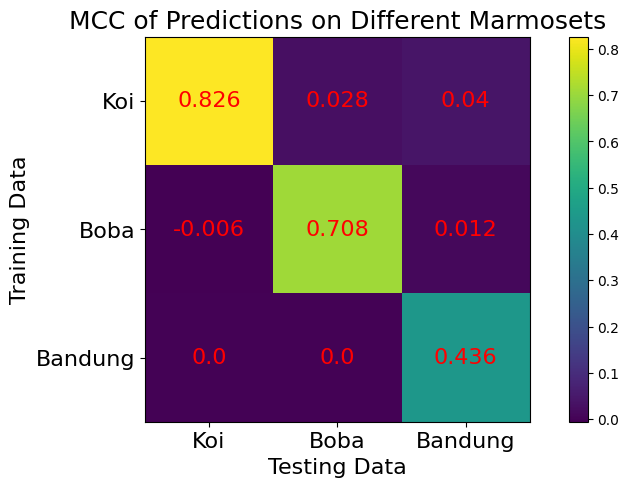

In [60]:
plt.imshow(visualise_mcc_7a, cmap='viridis', interpolation='nearest')

for i in range(len(visualise_mcc_7a)):
    for j in range(len(visualise_mcc_7a[i])):
        plt.text(j, i, round(visualise_mcc_7a[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("MCC of Predictions on Different Marmosets", size=18)

plt.xticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)
plt.yticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)

plt.colorbar()
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()

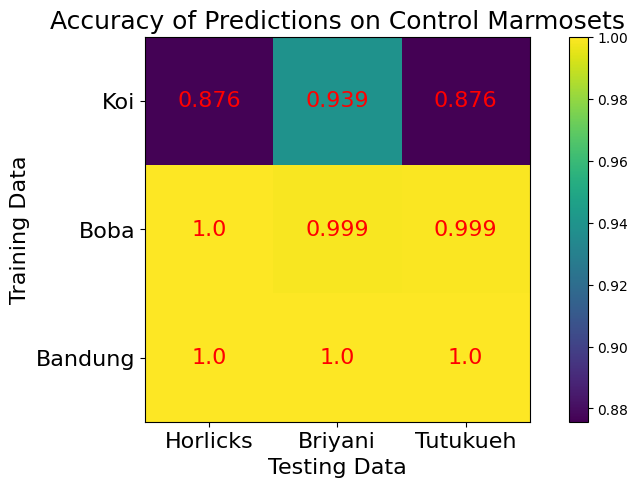

In [56]:
plt.imshow(visualise_acc_7a, cmap='viridis', interpolation='nearest')

for i in range(len(visualise_acc_7a)):
    for j in range(len(visualise_acc_7a[i])):
        plt.text(j, i, round(visualise_acc_7a[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.title("Accuracy of Predictions on Control Marmosets", size=18)

plt.xticks(list(range(len(test_only_names_7a))), [s.capitalize() for s in test_only_names_7a], size=16)
plt.yticks(list(range(len(train_names_7a))), [s.capitalize() for s in train_names_7a], size=16)

plt.colorbar()
plt.gcf().set_size_inches(10, 5)

# Show the plot
plt.show()

### Confusion Matrices

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


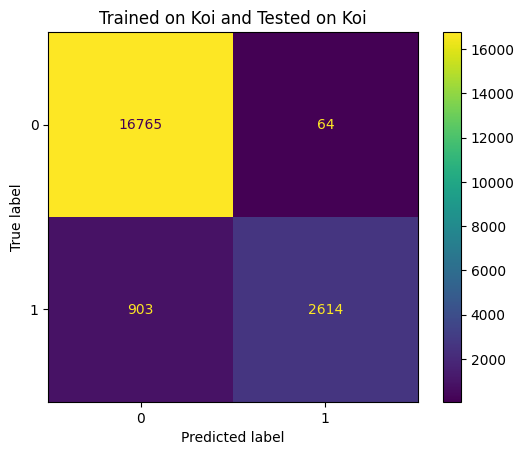

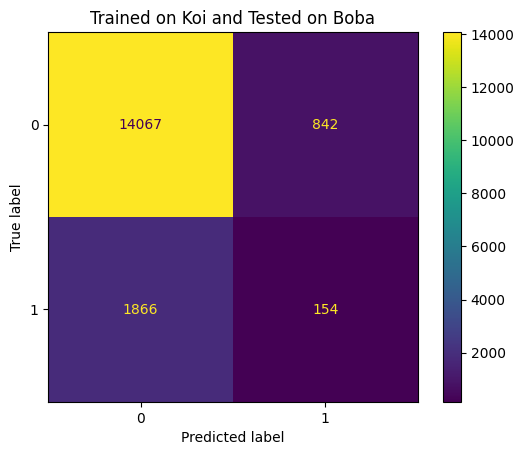

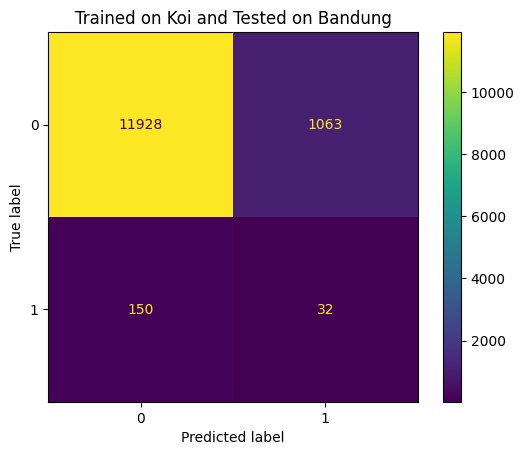

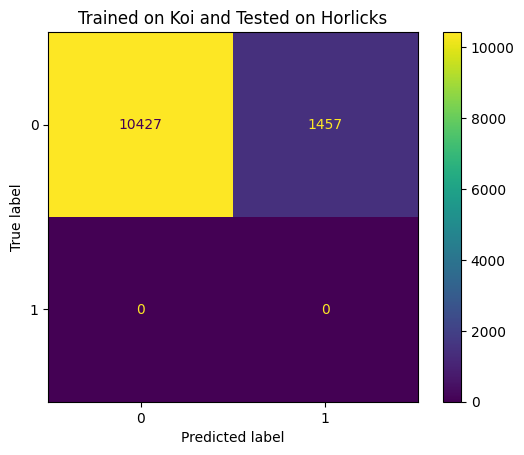

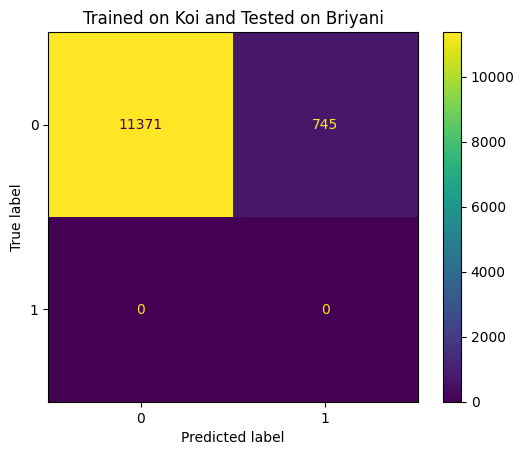

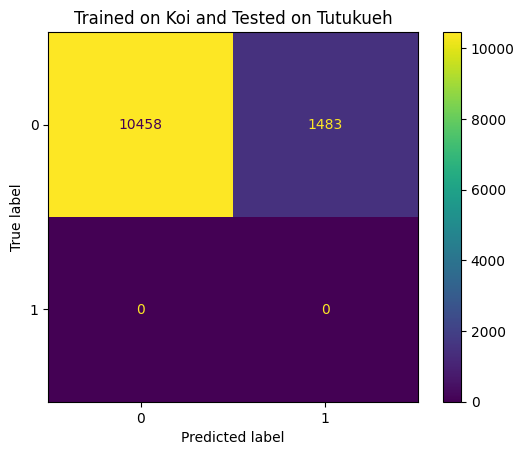

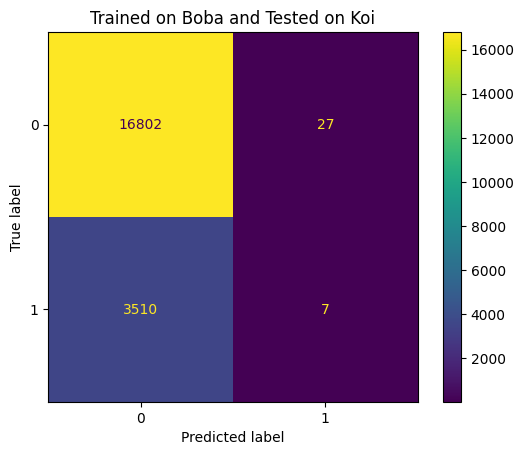

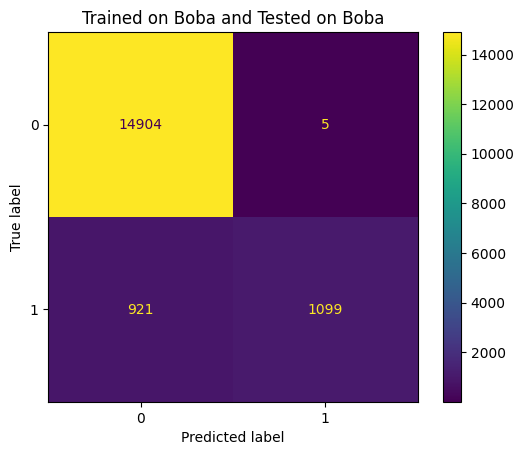

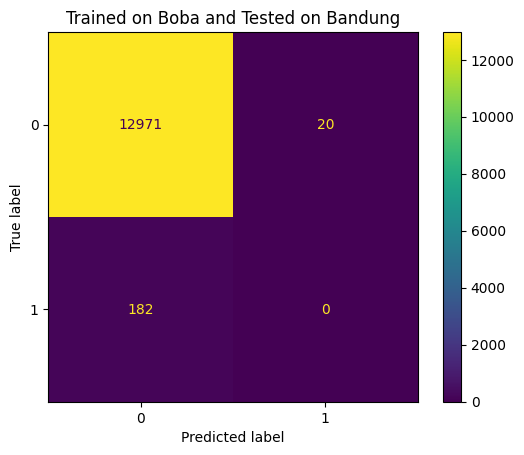

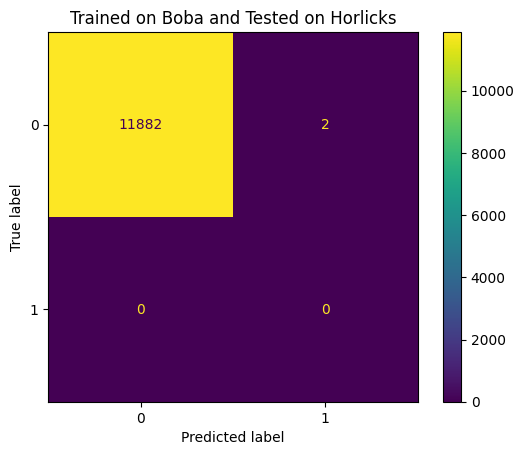

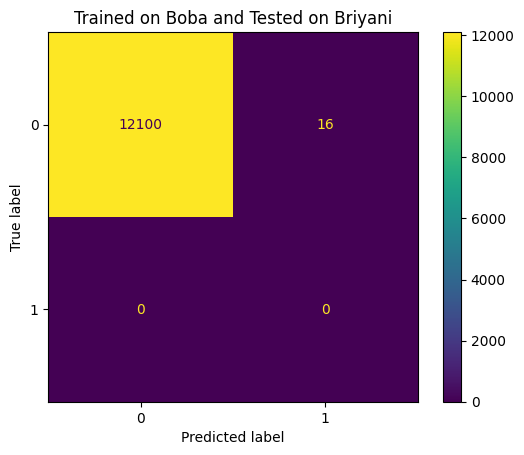

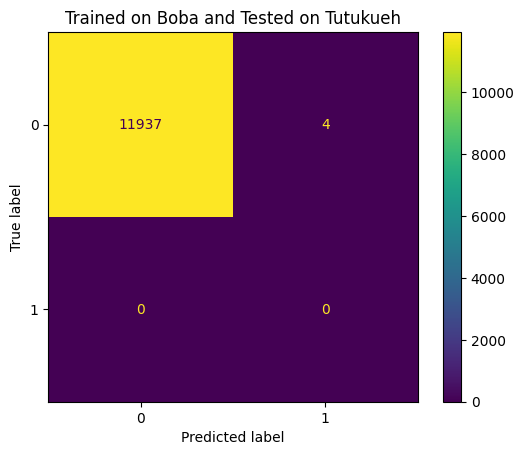

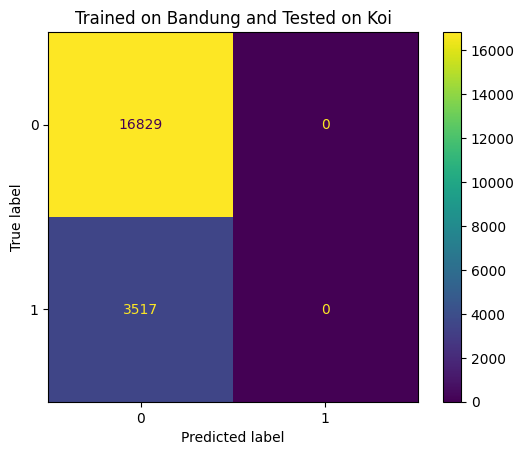

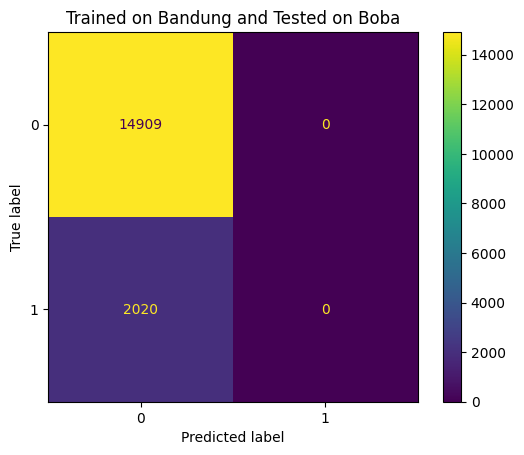

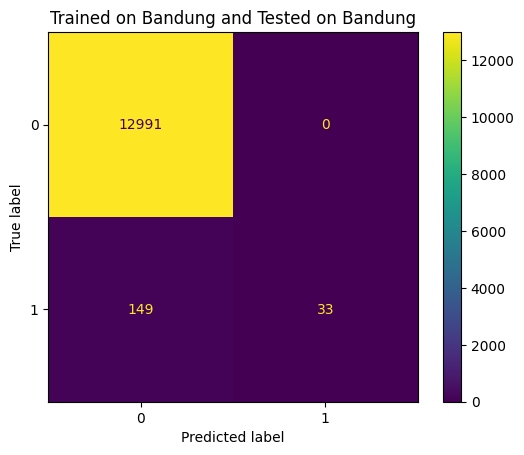

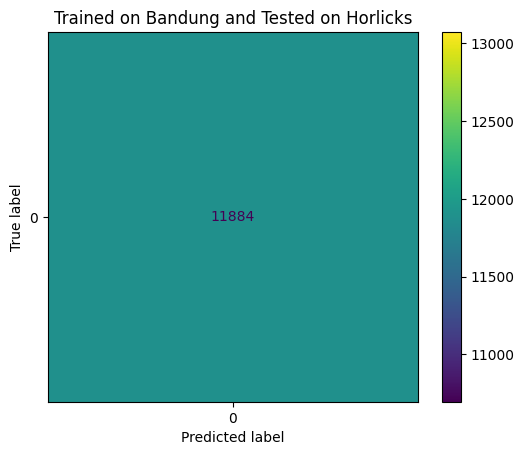

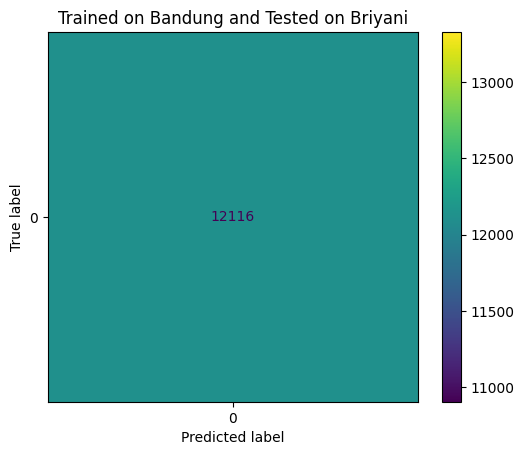

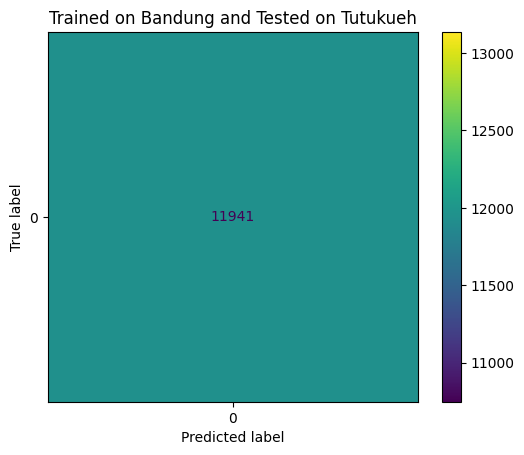

In [41]:
for train_name in results_7a:
    for test_name in results_7a[train_name]:
        cmd = ConfusionMatrixDisplay.from_predictions(test_labels_7a[test_name], 
                                                      results_7a[train_name][test_name]["predictions"], 
                                                      values_format="d")
        cmd.ax_.set_title(f"Trained on {train_name.capitalize()} and Tested on {test_name.capitalize()}")
plt.show()

In [22]:
len(labels_koi["koi_apr11"])

3787.2000000000003

In [20]:
len(results_7a["boba"]["koi_apr11"]["predictions"])

3785

## Test 7B: Noise Reduction

**Aim**: Check which sliding window size and threshold value produces the best results.

**Feature(s) Tested**: Directional Change

**Noise Correction**

_Thresholds_
* 0.0
* 0.1
* 0.2
* 0.3
* 0.4

_Sliding Window Sizes_
* 1
* 5
* 10
* 15 
* 20

**Weights**: None

**Class Balance**: None